In [1]:
from pathlib import Path
import pandas as pd
import pint
import pint_pandas
import matplotlib.pyplot as plt
import numpy as np
import sys

In [56]:
sys.path.append(str(Path.cwd().parent))

In [57]:
from src.utils import load_pint_data
from src.utils.pint_units import PREFERRED_UNITS

In [58]:
ROOT = Path.cwd().parent
IS_EXPORT = True
VERSION = "07"
DATA_TYPE = "Test"
print(ROOT)

/Users/thomassimader/Documents/NIRB


In [59]:
df_path = ROOT  / "data" / VERSION/ f"{DATA_TYPE.lower()}_samples.csv"
assert df_path.exists()
df_training = load_pint_data(df_path)
df_training.dtypes

T_h    pint[kelvin][float64]
dtype: object

In [60]:
for col in df_training.columns:
    if df_training[col].pint.dimensionality in PREFERRED_UNITS:
        unit = PREFERRED_UNITS[df_training[col].pint.dimensionality]
        df_training[col] = df_training[col].pint.to(unit)
units = df_training.dtypes
col_names = [f"{name} ({unit.units:~P})" for name, unit in zip(df_training.columns, units)]
df_training.columns = col_names

In [61]:
temp = df_training.pint.dequantify().agg(["count" ,"min", "max"])
temp

,T_h (°C)
unit,degree_Celsius
count,20.000000
min,132.857498
max,219.509890


In [62]:
for column in df_training.columns:  # Loop through the first level of the column multi-index
    df_training[column] = df_training[column].apply(lambda x: x.magnitude)  # Apply unit (adjust 'meter' to fit your case)


In [63]:
df_training.describe()

,T_h (°C)
count,20.000000
mean,175.595622
std,27.615749
min,132.857498
25%,154.671393
50%,167.639128
75%,200.673038
max,219.509890


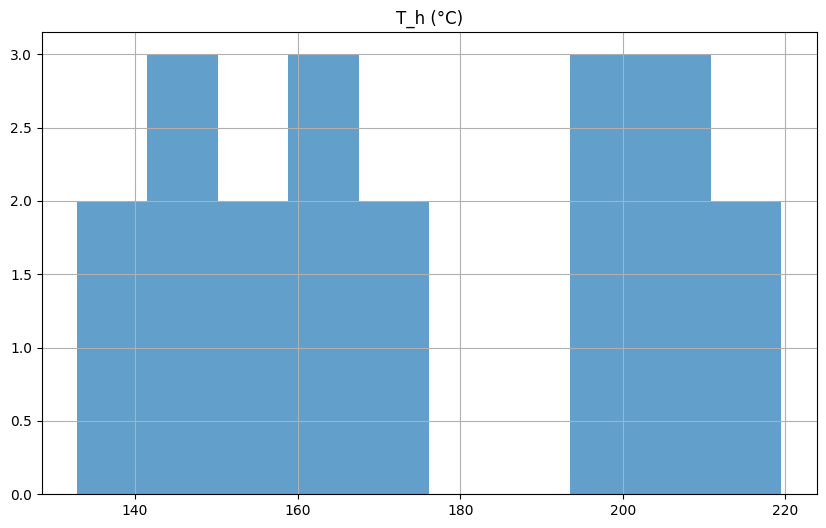

In [64]:
df_training.hist(figsize=(10, 6), alpha=0.7);
if IS_EXPORT:
    plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it


array([[<Axes: xlabel='T_h (°C)', ylabel='T_h (°C)'>]], dtype=object)

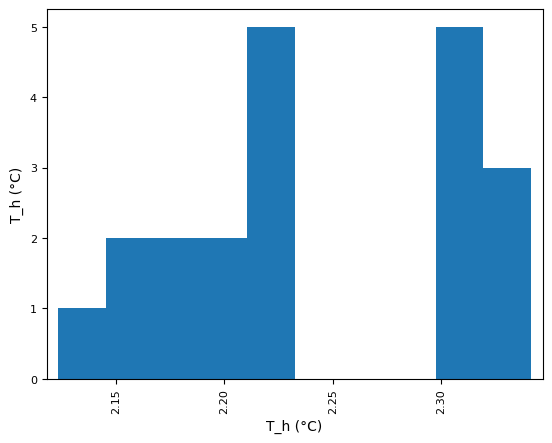

In [65]:
df_transformed = df_training.copy()
first_col = df_training.columns[0]
df_transformed[first_col] = np.log10(df_training[first_col])
pd.plotting.scatter_matrix(df_transformed)

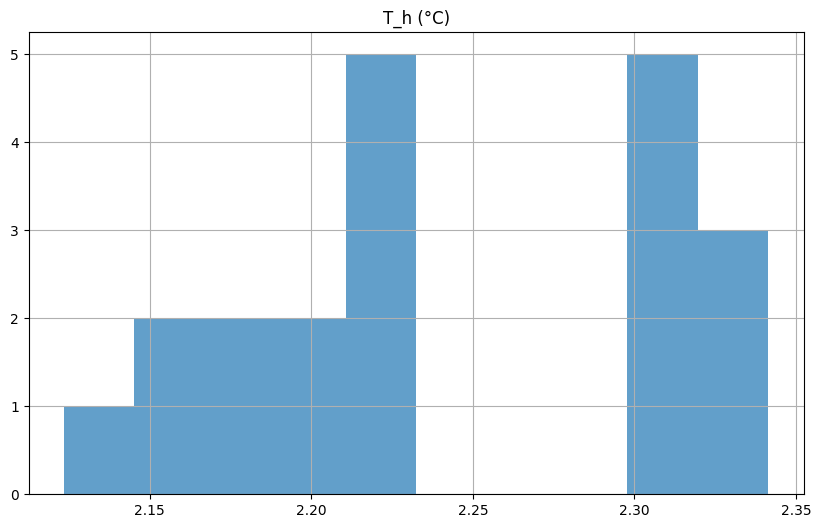

In [66]:
df_training.apply(lambda x : np.log10(x)).hist(figsize=(10, 6), alpha=0.7);
if IS_EXPORT:
    plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram_log.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it